In [12]:
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Binned Spectra/binned_raw_spectra.csv')
spectra = df.drop(columns=['Serovar'])

In [7]:
spectra.head()

,2005.6,2006.6,2007.6,2008.6,2009.6,2010.6,2011.6,2012.6,2013.6,2014.6,...,19938.6,19940.1,19941.7,19943.2,19944.8,19946.4,19948.1,19949.6,19951.2,19952.7
0,2555.248616,2492.952914,2448.851560,2558.521201,2401.285991,2432.952679,2468.548662,2368.582671,2362.008754,2478.270548,...,180.726349,181.282919,201.397806,201.370509,209.396809,219.516902,212.915716,222.264650,213.895397,201.930453
1,1578.573695,1778.665251,1726.931613,1587.898862,1545.504918,1521.229487,1383.264049,1655.836988,1709.138734,1689.224426,...,150.854048,125.693127,135.741589,132.679261,130.856651,148.723631,181.027783,148.529205,130.664563,145.334380
2,1129.944732,1075.744892,1126.467756,1075.311452,1165.752830,1265.077865,1197.455300,1140.686939,1094.059614,1137.376126,...,110.174245,108.612916,112.524766,109.859379,122.800323,134.542787,128.863480,131.522596,131.984655,134.042046
3,4500.115634,4506.589878,4526.849442,3963.104082,4399.852549,4636.299881,4757.057797,4722.727727,4667.115738,4356.528251,...,301.252291,274.279056,286.213040,305.861374,317.575662,325.871402,340.715783,328.050799,362.352255,353.536022
4,2016.797958,1851.484064,1932.506155,1961.980695,2031.301381,2179.652174,2460.484469,2386.879464,2163.735188,2112.932010,...,273.033621,264.707127,246.052000,230.826312,221.401550,226.441579,245.379276,252.294849,265.180241,269.944910


In [18]:
sample_index = 90
spectra.columns = spectra.columns.astype(float)
sample = spectra.iloc[sample_index,:]
sample_srv = df['Serovar'][sample_index]

Text(0.8, 0.9, 'S. Altona')

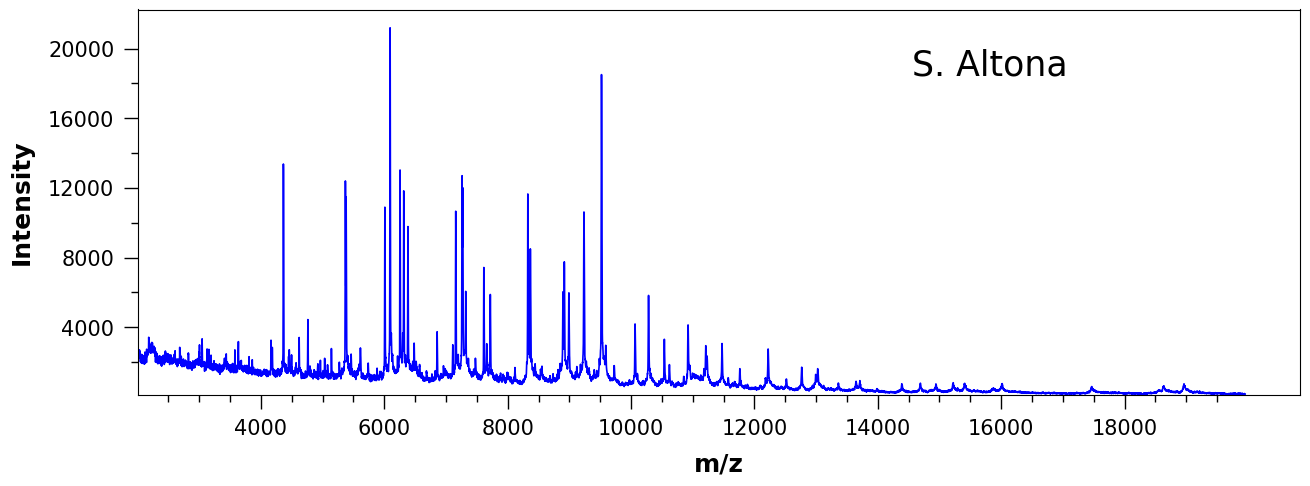

In [19]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
ax.plot(sample.index, sample.values, linewidth=1.2,c='b')
ax.tick_params(axis='x', labelsize=15, which='major', pad=7)
ax.tick_params(axis='y', labelsize=15, which='major', pad=7)
ax.tick_params(axis='x', length = 10, width = 1)
ax.tick_params(axis='x', which = 'minor', length = 5, width = 1)
ax.tick_params(axis='y', length = 10, width = 1)
ax.tick_params(axis='y', which = 'minor', length = 5, width = 1)
ax.set_xticks(np.arange(min((sample.index//1000)*1000),max((sample.index+1000)//1000*1000),2000))
ax.set_xticks(np.arange(min((sample.index//1000)*1000),max((sample.index+1000)//1000*1000),500), minor=True)
ax.set_yticks(np.arange(min((sample.values//1000)*1000),max((sample.values+1000)//1000*1000),4000))
ax.set_yticks(np.arange(min((sample.values//1000)*1000),max((sample.values)//1000*1000),2000), minor=True)
ax.set_xlim(min(sample.index),)
ax.set_ylim(min(sample.values),)
ax.set_xlabel('m/z',fontsize=18, fontweight='bold',labelpad = 10)
ax.set_ylabel('Intensity',fontsize=18, fontweight='bold',labelpad = 10)
ax.text(.8, .9, 'S. '+sample_srv, ha='right', va='top', transform=ax.transAxes, fontsize=25)

In [21]:
ft_sample = fft(sample.values)

In [23]:
ft_sample

array([16425632.85190549      -0.j        ,
        -822162.51689049-6014014.16799941j,
         632741.5304606  -892815.68633932j, ...,
         638504.2244556 +1332662.22699676j,
         632741.5304606  +892815.68633932j,
        -822162.51689049+6014014.16799941j])